In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pelutils.ds.plot import update_rc_params, rc_params_small, figsize_std, figsize_wide
from model import TemplateMatcher
from evaluation import evaluate
from data_utils.generator import generate_imgs
from skimage.color import rgb2hsv
from skimage.morphology import erosion, dilation, opening, closing
from scipy.ndimage import median_filter
from skimage.measure import label, regionprops, regionprops_table
import utils as ut
import cv2
from skimage.filters import gaussian, unsharp_mask, edges

update_rc_params(rc_params_small)
update_rc_params({"figure.figsize": (8, 8)})

In [2]:
df = pd.read_pickle("data/df.pkl")
df.columns

Index(['name', 'img', 'waldo', 'pos'], dtype='object')

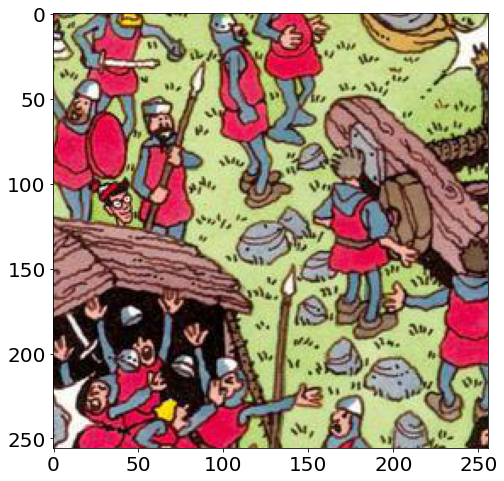

In [3]:
im = df.img[313].astype(np.uint8)
plt.imshow(im)
plt.show()

In [4]:
def draw_circles(img, circles):
    # img = cv2.imread(img,0)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    if circles is None:
        return cimg
    for i in circles[0]:
    # draw the outer circle
        cv2.circle(cimg,(int(i[0]),int(i[1])),round(i[2]),(0,255,0),2)
        # draw the center of the circle
        # cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        # cv2.putText(cimg,str(i[0])+str(',')+str(i[1]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 255)
    return cimg

[[[ 40. 120.  21.]
  [ 40. 216.  21.]
  [ 88. 184.  21.]
  [168.  88.  21.]
  [216. 152.  21.]
  [120.  40.  21.]
  [168. 200.  21.]
  [232.  88.  21.]
  [232. 232.  21.]]]


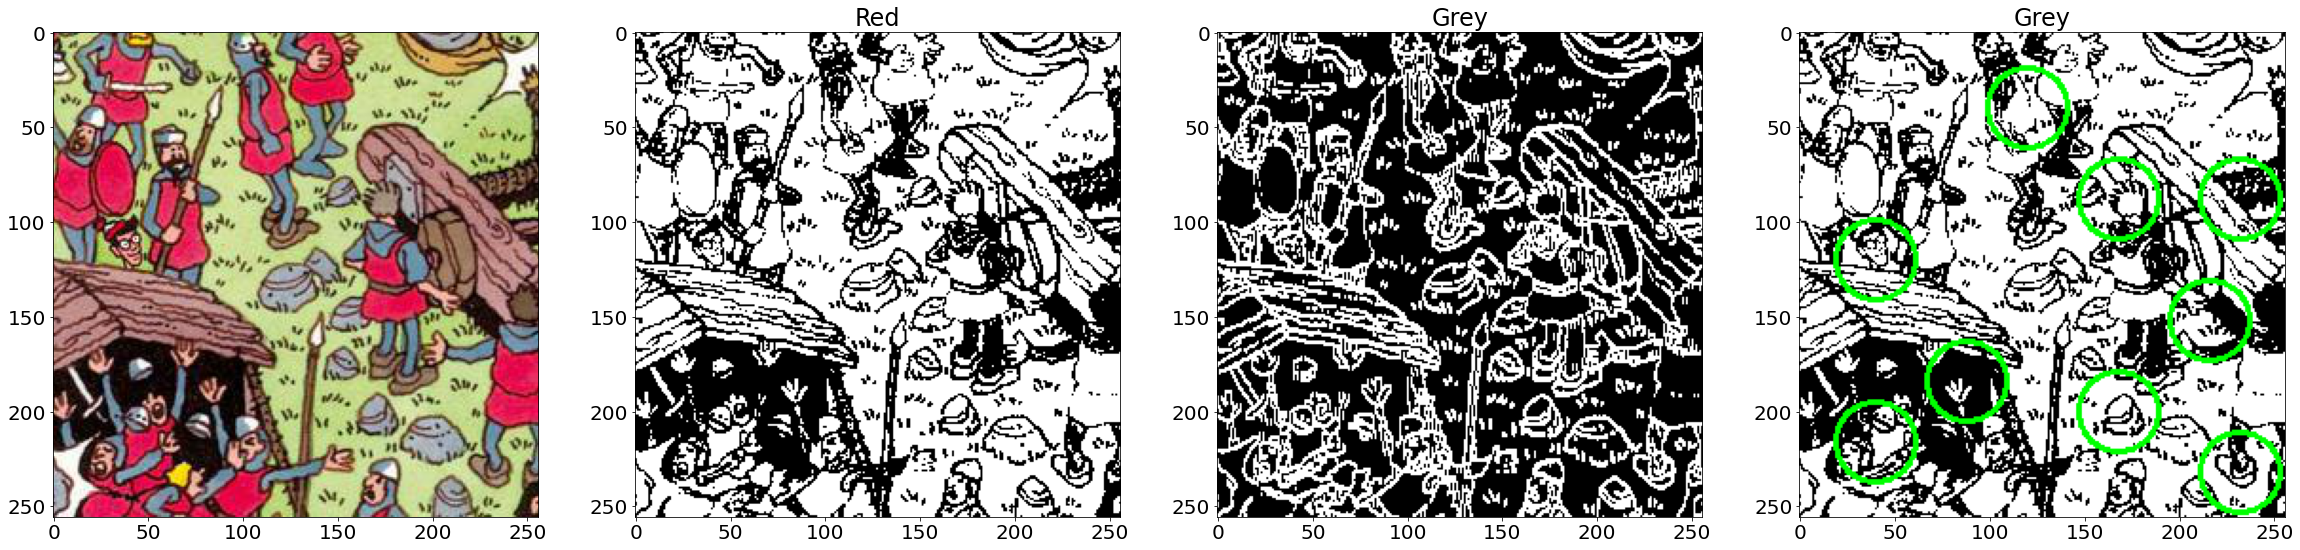

In [5]:
red = im.copy()
red[..., 1:] = 0
red = ut.lims(red)
grey = red.copy()[..., 0]
# th = 255-erosion(255-255 * (grey>100))
th = (255 * (grey>255//2)).astype(np.uint8)
gl = cv2.Laplacian(th, cv2.CV_8UC1, ksize=3)
gl = cv2.dilate(gl, (3, 3))
gl = cv2.bilateralFilter(gl, 5, 9, 9)
circles = cv2.HoughCircles(gl, cv2.HOUGH_GRADIENT, 16, 55, param2=450, minRadius=5, maxRadius=30)
print(circles)
cimg = draw_circles(th.copy(), circles)
plt.figure(figsize=(40, 10))

plt.subplot(141)
plt.imshow(im)

plt.subplot(142)
plt.imshow(th, cmap="gray")
plt.title("Red")

plt.subplot(143)
plt.imshow(gl, cmap="gray")
plt.title("Grey")

plt.subplot(144)
plt.imshow(cimg, cmap="gray")
plt.title("Grey")

plt.show()

/tmp/ipykernel_102008/2255783584.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gim = unsharp_mask(gaussian(im)) * 255


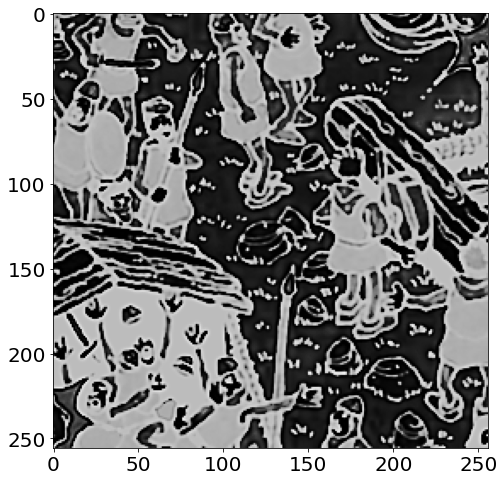

In [9]:
skin_tone = np.array([219, 171, 159], dtype=float)
gim = unsharp_mask(gaussian(im)) * 255
dist = (np.abs(gim - skin_tone)).mean(axis=2)
dist = ut.lims(((gim - skin_tone)**2).sum(axis=2) ** 0.5).astype(np.uint8)
plt.imshow(unsharp_mask(ut.logistic(dist)), cmap="gray")
plt.show()

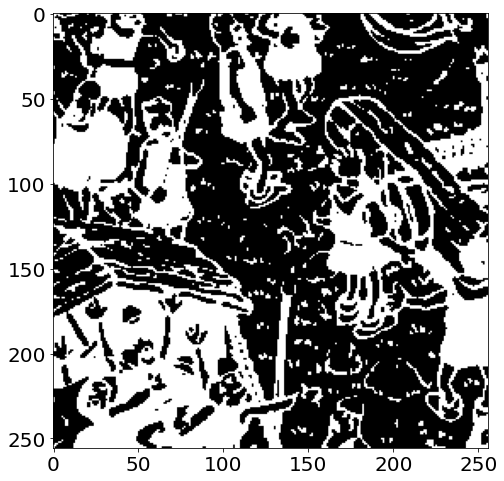

In [7]:
# th = unsharp_mask(dist)
th = 255 * (dist > 150)
plt.imshow(th, cmap="gray")
plt.show()